## Assignment Simple Linear Regression 
## Predict delivery time using sorting time 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
slr=pd.read_csv("c:/Users/mahesh/datasetcsv/delivery_time.csv")

In [4]:
slr

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
slr.shape

(21, 2)

In [6]:
slr.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
## scatter plot

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

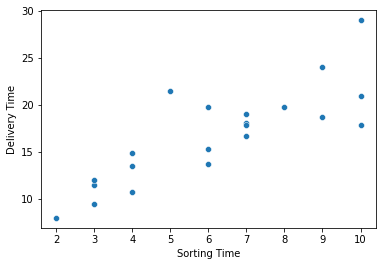

In [8]:
sns.scatterplot(x=slr['Sorting Time'],y=slr['Delivery Time'])

## Correlation

In [9]:
slr.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
X=np.array(slr)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif = [variance_inflation_factor(X,i) for i in range(X.shape[1]-1)]
print(vif)
X=pd.DataFrame()

[22.22488982965109]


C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

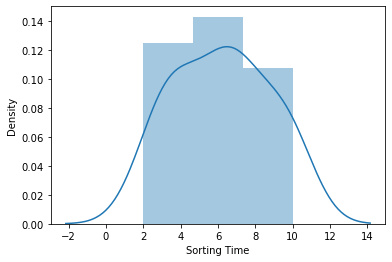

In [11]:
sns.distplot(slr['Sorting Time'])

C:\Users\mahesh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

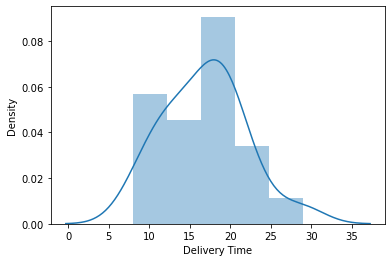

In [12]:
sns.distplot(slr['Delivery Time'])

## Fitting a Linear Regression Model

In [13]:
slr=slr.rename({'Sorting Time':'sortingtime'},axis=1)

In [14]:
slr=slr.rename({'Delivery Time':'deliverytime'},axis=1)

In [15]:
slr

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
import statsmodels.formula.api as smf
model = smf.ols("deliverytime~sortingtime",data = slr).fit()


<AxesSubplot:xlabel='sortingtime', ylabel='deliverytime'>

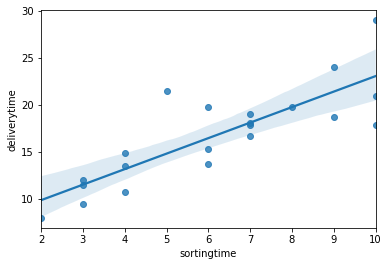

In [17]:
sns.regplot(x='sortingtime',y='deliverytime',data=slr)

In [18]:
#Coefficients
model.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept      3.823349
sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
sortingtime    0.000004
dtype: float64


In [20]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

<AxesSubplot:>

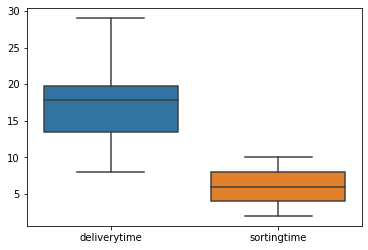

In [21]:
sns.boxplot(data=slr)

## Predict for new data

In [22]:
import pandas as pd

In [23]:
#Predict for 10 min sorting time 
newdata1=pd.Series([4])

In [24]:
del_pred=pd.DataFrame(newdata1,columns=['sortingtime'])

In [25]:
model.predict(del_pred)

0    13.178814
dtype: float64

In [26]:
slr

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9
